# Example 8 - State Space Model

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit import Elements as sce
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.Circuit.state_space_model import symbolic_state_space_model
import sympy as sp

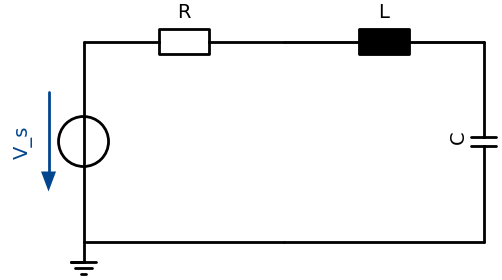

In [2]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(name='V_s', reverse=True)
    schematic += sce.Resistor(name='R').right()
    schematic += sce.Inductance(name='L').right()
    schematic += sce.Capacitor(name='C').down()
    schematic += sce.Line().left()
    schematic += sce.Line().left()
    schematic += sce.Ground()

In [3]:
circuit = circuit_translator(schematic)
ssm = symbolic_state_space_model(circuit, voltage_ids=['C'])

s = sp.Symbol('s', complex=True)
I = sp.eye(2)

A = ssm.A
B = ssm.B
C = ssm.C
D = ssm.D

G = C@(s*I-A).inv()@B + D
G

Matrix([[1.0/(1.0*C*L*s**2 + 1.0*C*R*s + 1.0)]])